In [1]:
from correctionlib import _core
import json
from array import array
from ROOT import TFile, TH2D, TCanvas

Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<std::vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 
Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 


Welcome to JupyROOT 6.26/11


In [136]:
fname = "electron.json.gz"
if fname.endswith(".json.gz"):
    import gzip
    with gzip.open(fname,'rt') as file:
        data = file.read().strip()
        evaluator = _core.CorrectionSet.from_string(data)
else:
    evaluator = _core.CorrectionSet.from_file(fname)

myevaluator = evaluator['Electron-ID-SF']

In [137]:
ptRange = {}
ptRange[15.0] = "pt:[10.00,20.00]"
ptRange[27.0] = "pt:[20.00,35.00]"
ptRange[42.0] = "pt:[35.00,50.00]"
ptRange[75.0] = "pt:[50.00,100.00]"
ptRange[200.0] = "pt:[100.00,Inf]"

etaRange = {}
etaRange[-3.] = "eta:[-Inf,-2.]"
etaRange[-1.8] = "eta:[-2.,-1.566]"
etaRange[-1.5] = "eta:[-1.566,-1.444]"
etaRange[-1.2] = "eta:[-1.444,-1.0]"
etaRange[-0.5] = "eta:[-1.0,0.0]"
etaRange[0.5] = "eta:[0.0,1.0]"
etaRange[1.2] = "eta:[1.0,1.444]"
etaRange[1.5] = "eta:[1.444,1.566]"
etaRange[1.8] = "eta:[1.566,2.0]"
etaRange[3.] = "eta:[2.0,Inf]"


In [138]:
namesId = ['Veto', 'Loose', 'Medium', 'Tight']

namesReco = ['RecoBelow20', 'Reco20to75', 'RecoAbove75']

In [139]:
evaluator = _core.CorrectionSet.from_file('electron.json')

valsf= evaluator["Electron-ID-SF"].evaluate("2022Re-recoE+PromptFG","sf","RecoBelow20",1.1, 15.0)
print("sf is:"+str(valsf))

sf is:0.9209725856781006


In [192]:
new = {}
for name in namesReco:
    typeSF = {}
    eta_pt = {}
    for eta in etaRange.keys():
        etaDict = {}
        for pt in ptRange.keys():
            ptDict = {}
            valsf = myevaluator.evaluate("2022Re-recoE+PromptFG","sf",name, eta, pt)
            val_up = myevaluator.evaluate("2022Re-recoE+PromptFG","sfup",name, eta, pt)
            val_down = myevaluator.evaluate("2022Re-recoE+PromptFG","sfdown",name, eta, pt)

            print("Eta {}, Pt {}, SF {} +{}-{}".format(eta, pt, valsf, val_up, val_down))
            ptDict["value"] = valsf
            ptDict["error_up"] = val_up
            ptDict['error_down'] = val_down
            etaDict[ptRange[pt]] = ptDict
        eta_pt[etaRange[eta]] = etaDict
    typeSF["eta_pt"] = eta_pt
    new[name] = typeSF

Eta -3.0, Pt 15.0, SF 0.9372892379760742 +0.9763183219928068-0.8982601539593417


RuntimeError: Index above bounds in MultiBinning input argument4 val: 27.000000

In [141]:
fout = 'RunFG_SF_ID.json'
with open(fout, 'w+') as f:
    json.dump(new, f)
new

{'Veto': {'eta_pt': {'eta:[-Inf,-2.]': {'pt:[10.00,20.00]': {'value': 1.046433687210083,
     'error_up': 1.06090108992691,
     'error_down': 1.031966284493256},
    'pt:[20.00,35.00]': {'value': 1.012378811836243,
     'error_up': 1.027166886917947,
     'error_down': 0.9975907367545382},
    'pt:[35.00,50.00]': {'value': 1.009546399116516,
     'error_up': 1.0159384298376857,
     'error_down': 1.0031543683953466},
    'pt:[50.00,100.00]': {'value': 1.0006146430969238,
     'error_up': 1.0045960236311442,
     'error_down': 0.9966332625627036},
    'pt:[100.00,Inf]': {'value': 1.01188325881958,
     'error_up': 1.0177264677964604,
     'error_down': 1.0060400498426998}},
   'eta:[-2.,-1.566]': {'pt:[10.00,20.00]': {'value': 1.0381075143814087,
     'error_up': 1.383774423170165,
     'error_down': 0.6924406055926524},
    'pt:[20.00,35.00]': {'value': 1.0009852647781372,
     'error_up': 1.0221445060171388,
     'error_down': 0.9798260235391356},
    'pt:[35.00,50.00]': {'value': 0.

In [142]:
#example code
'''from correctionlib import _core

evaluator = _core.CorrectionSet.from_file('./../POG/EGM/2016postVFP_UL/electron.json')

valsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","RecoBelow20",1.1, 15.0)
print("sf is:"+str(valsf))

valsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","RecoAbove20",1.1, 25.0)
print("sf is:"+str(valsf))

valsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","Medium",1.1, 34.0)
print("sf is:"+str(valsf))

valsystup= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sfup","Medium",1.1, 34.0)
print("systup is:"+str(valsystup))

valsystdown= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sfdown","Medium",1.1, 34.0)
print("systdown is:"+str(valsystdown))'''

'from correctionlib import _core\n\nevaluator = _core.CorrectionSet.from_file(\'./../POG/EGM/2016postVFP_UL/electron.json\')\n\nvalsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","RecoBelow20",1.1, 15.0)\nprint("sf is:"+str(valsf))\n\nvalsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","RecoAbove20",1.1, 25.0)\nprint("sf is:"+str(valsf))\n\nvalsf= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sf","Medium",1.1, 34.0)\nprint("sf is:"+str(valsf))\n\nvalsystup= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sfup","Medium",1.1, 34.0)\nprint("systup is:"+str(valsystup))\n\nvalsystdown= evaluator["UL-Electron-ID-SF"].evaluate("2016postVFP","sfdown","Medium",1.1, 34.0)\nprint("systdown is:"+str(valsystdown))'

In [143]:
#now open json file and create root file

files = ['RunFG_SF_ID.json']

In [191]:
for file in files:
	output = TFile(file.strip('.json') + '.root', 'RECREATE')

	era = file.split('_')[0][3:]
	sfType = file.split('_')[-1][:-5]
	if sfType == 'ISO':
		sfType = sfType.title() # 'Iso'

	print(file, era, sfType)

	f = open(file, 'r')
	results = json.load(f)

	for r in results.keys():
		xbinNames = [] # pt
		ybinNames = [] # eta
		values = {}
		errors_up = {}
		errors_down = {}

		etaLabel = 'eta_pt' if 'eta_pt' in results[r] else 'eta_pair_newTuneP_probe_pt'
		yLabelPosition = int(4) if 'eta_pt' in results[r] else int(24)

		for xbin in results[r][etaLabel]:
			xbinNames.append(xbin)
			for ybin in results[r][etaLabel][xbin]:
				ybinNames.append(ybin)
				values[ybin, xbin] = results[r][etaLabel][xbin][ybin]['value']
				errors_up[ybin, xbin] = results[r][etaLabel][xbin][ybin]['error_up']
				errors_down[ybin, xbin] = results[r][etaLabel][xbin][ybin]['error_down']


		# bins are stored as strings like 'pt:[20.00,25.00]', so figure out real values here

		xbinEdges = []
		for x in xbinNames:
			range_ = x.split(':')[-1].strip('[]').split(',')
			edge1 = float(range_[0])
			edge2 = float(range_[1])
			if edge1 == float('-Inf'):
				edge1 = float(-2.5)
			if edge2 == float('Inf'):
				edge2 = float(2.5)
			if not edge1 in xbinEdges:
				xbinEdges.append(edge1)
			if not edge2 in xbinEdges:
				xbinEdges.append(edge2)
		xbinEdges.sort()

		ybinEdges = []
		for y in ybinNames:
			range_ = y.split(':')[-1].strip('[]').split(',')
			edge1 = float(range_[0])
			edge2 = float(range_[1])
			if edge2 == float('Inf'):
				edge2 = float(500.)
			if not edge1 in ybinEdges:
				ybinEdges.append(edge1)
			if not edge2 in ybinEdges:
				ybinEdges.append(edge2)
		ybinEdges.sort()

		print("r", r)

		h = TH2D(r, r, len(xbinEdges)-1, array('d', xbinEdges), len(ybinEdges)-1, array('d', ybinEdges))

		values = {}
		errors = {}

		for xbin in results[r][etaLabel]:
			#print('ybin', ybin)
			range_ = xbin.split(':')[-1].strip('[]').split(',')
			xval = float(range_[0])
			if xval == float("-Inf"):
				xval = -2.5
			for ybin in results[r][etaLabel][xbin]:
				#print("xval {}, yval {}".format(xval, yval))
				yval = float(ybin.split(',')[0][yLabelPosition:])

				#print("xbin", xbin)
				#print("xval {}, yval {}, bin {}".format(xval+0.01, yval+1, h.FindBin(xval+0.01, yval+1)))
				ibin = h.FindBin(xval + 0.01, yval + 1)
				h.SetBinContent(ibin, results[r][etaLabel][xbin][ybin]['value'])
				h.SetBinError(ibin, results[r][etaLabel][xbin][ybin]['error_up'])
				h.SetBinError(ibin, -results[r][etaLabel][xbin][ybin]['error_down'])
				print('x {}, y {}, bin {}, val {}, +{}-{}'.format(xval, yval, ibin, results[r][etaLabel][xbin][ybin]['value'], results[r][etaLabel][xbin][ybin]['error_up'], -results[r][etaLabel][xbin][ybin]['error_down']))


		#h.GetZaxis().SetRangeUser(0.7, 1.1)
		h.GetYaxis().SetTitle('muon pt [GeV]')
		h.GetXaxis().SetTitle('|#eta|')

		output.cd()
		h.Write()

	output.Close()

RunFG_SF_ID.json FG ID
r Veto
x -2.5, y 10.0, bin 13, val 1.046433687210083, +1.06090108992691--1.031966284493256
x -2.5, y 20.0, bin 25, val 1.012378811836243, +1.027166886917947--0.9975907367545382
x -2.5, y 35.0, bin 37, val 1.009546399116516, +1.0159384298376857--1.0031543683953466
x -2.5, y 50.0, bin 49, val 1.0006146430969238, +1.0045960236311442--0.9966332625627036
x -2.5, y 100.0, bin 61, val 1.01188325881958, +1.0177264677964604--1.0060400498426998
x -2.0, y 10.0, bin 14, val 1.0381075143814087, +1.383774423170165--0.6924406055926524
x -2.0, y 20.0, bin 26, val 1.0009852647781372, +1.0221445060171388--0.9798260235391356
x -2.0, y 35.0, bin 38, val 0.9967236518859864, +0.999816632071439--0.9936306717005337
x -2.0, y 50.0, bin 50, val 0.9936985969543456, +0.9954638438835932--0.9919333500250982
x -2.0, y 100.0, bin 62, val 1.0234287977218628, +1.0307755758239383--1.0160820196197873
x -1.566, y 10.0, bin 15, val 0.6333550214767456, +1.2952538018492776-0.02854375889578642
x -1.566,

In [162]:
ybinEdges

[10.0, 20.0, 35.0, 50.0, 100.0, 500.0]

In [146]:
!ls -ltr

total 2688
-rw-r--r-- 1 mcarrigan users   13129 May 14 09:45 electronSS.json.gz
-rw-r--r-- 1 mcarrigan users   13129 May 14 09:45 photon.json.gz
-rw-r--r-- 1 mcarrigan users   13129 May 14 09:45 photonSS.json.gz
-rw-r--r-- 1 mcarrigan users     148 May 14 09:46 README
-rw-r--r-- 1 mcarrigan users    3145 May 14 09:49 accessJSONInfo.py
-rw-r--r-- 1 mcarrigan users  181596 May 14 09:52 electron.json
-rw-r--r-- 1 mcarrigan users   16258 May 14 09:54 electron.json.gz
-rw-r--r-- 1 mcarrigan users 2308018 May 14 10:27 muon_Z.json
-rw-r--r-- 1 mcarrigan users    2301 May 14 11:26 rootifyJSON.py
-rw-r--r-- 1 milliqan  users   24213 May 14 11:32 electron_2022FG_SF.json
-rw-r--r-- 1 milliqan  users     475 May 14 11:36 electron_2022FG_SF.json.root
-rw-r--r-- 1 milliqan  users    7925 May 14 11:58 RunFG_SF_ID.json.root
-rw-r--r-- 1 mcarrigan users  110435 May 14 12:59 accessJSONInfoDebug.ipynb
-rw-r--r-- 1 milliqan  users   24213 May 14 13:00 RunFG_SF_ID.json
-rw-r--r-- 1 milliqan  users    5209 

In [147]:
c1 = TCanvas("c1", "c1", 600, 600)
Veto.Draw()
c1.Draw()

NameError: name 'Veto' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [148]:
!ls

README		       accessJSONInfoDebug.ipynb  electron_2022FG_SF.json.root
RunFG_SF_ID.json       electron.json		  muon_Z.json
RunFG_SF_ID.json.root  electron.json.gz		  photon.json.gz
RunFG_SF_ID.root       electronSS.json.gz	  photonSS.json.gz
accessJSONInfo.py      electron_2022FG_SF.json	  rootifyJSON.py


In [186]:
fin = TFile.Open('RunFG_SF_ID.root')

In [187]:
fin.ls()

veto = fin.Get('Veto')

TFile**		RunFG_SF_ID.root	
 TFile*		RunFG_SF_ID.root	
  KEY: TH2D	Veto;1	Veto
  KEY: TH2D	Loose;1	Loose
  KEY: TH2D	Medium;1	Medium
  KEY: TH2D	Tight;1	Tight


50.0


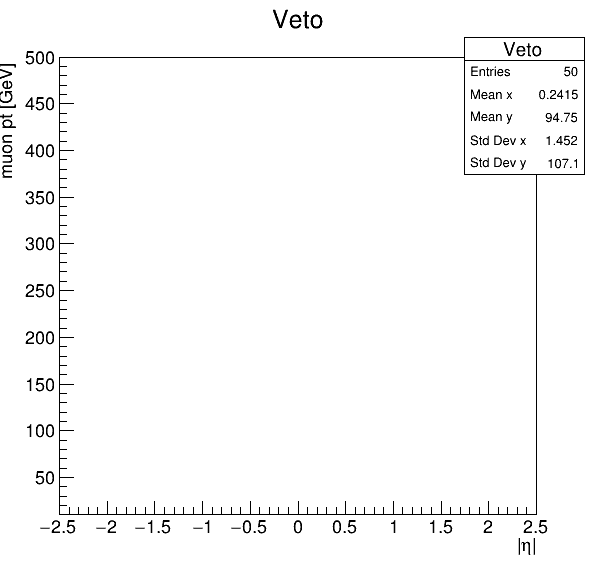

In [188]:
veto.Draw()
print(veto.GetEntries())
c1.Draw()

In [189]:
for ix in range(100):
    print(ix, veto.GetBinContent(ix))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 1.046433687210083
13 0.0
14 1.0381075143814087
15 0.6333550214767456
16 0.9652270674705504
17 0.9542650580406188
18 0.9521268606185912
19 0.9750829935073853
20 0.699651300907135
21 0.5571431517601013
22 1.0426721572875977
23 0.0
24 1.012378811836243
25 0.0
26 1.0009852647781372
27 1.0472626686096191
28 0.9662179946899414
29 0.9759498238563538
30 0.973947525024414
31 0.9656556248664856
32 1.070077896118164
33 0.9992049932479858
34 1.005825757980347
35 0.0
36 1.009546399116516
37 0.0
38 0.9967236518859864
39 1.0198566913604736
40 0.979578733444214
41 0.9837079048156738
42 0.983642876148224
43 0.9801567792892456
44 1.0210180282592771
45 0.9963203072547911
46 1.0033934116363523
47 0.0
48 1.0006146430969238
49 0.0
50 0.9936985969543456
51 1.036372423171997
52 0.976669430732727
53 0.979971170425415
54 0.981721580028534
55 0.9787260293960572
56 1.0341551303863523
57 0.9950429797172546
58 0.9985482096672058
59 0.0
60 

In [169]:
veto.GetN

8

In [165]:
xbinEdges

[-2.5, -2.0, -1.566, -1.444, -1.0, 0.0, 1.0, 1.444, 1.566, 2.0, 2.5]

#alter code to work with reco data

In [205]:
namesReco = {'RecoBelow20':[10, 20], 'Reco20to75':[20.0, 45.0, 75.0], 'RecoAbove75':[75.0, 100.0, float('Inf')]}
namesReco = {'RecoBelow20':[15], 'Reco20to75':[32, 60], 'RecoAbove75':[82, 200]}

ptRange = {}
ptRange[15.0] = "pt:[10.00,20.00]"
ptRange[32.0] = "pt:[20.00,45.00]"
ptRange[60.0] = "pt:[45.00,75.00]"
ptRange[82.0] = "pt:[75.00,100.00]"
ptRange[200.0] = "pt:[100.00,Inf]"

In [206]:
new = {}
for name, values in namesReco.items():
    typeSF = {}
    eta_pt = {}
    for eta in etaRange.keys():
        etaDict = {}
        for pt in values:
            pt = float(pt)
            ptDict = {}
            valsf = myevaluator.evaluate("2022Re-recoE+PromptFG","sf",name, eta, pt)
            val_up = myevaluator.evaluate("2022Re-recoE+PromptFG","sfup",name, eta, pt)
            val_down = myevaluator.evaluate("2022Re-recoE+PromptFG","sfdown",name, eta, pt)

            print("Eta {}, Pt {}, SF {} +{}-{}".format(eta, pt, valsf, val_up, val_down))
            ptDict["value"] = valsf
            ptDict["error_up"] = val_up
            ptDict['error_down'] = val_down
            etaDict[ptRange[pt]] = ptDict
        eta_pt[etaRange[eta]] = etaDict
    typeSF["eta_pt"] = eta_pt
    new[name] = typeSF

Eta -3.0, Pt 15.0, SF 0.9372892379760742 +0.9763183219928068-0.8982601539593417
Eta -1.8, Pt 15.0, SF 0.951312780380249 +1.0153994904850214-0.8872260702754765
Eta -1.5, Pt 15.0, SF 0.9455876350402832 +1.5208563798012311-0.3703188902793354
Eta -1.2, Pt 15.0, SF 0.9209725856781006 +1.009378427541392-0.8325667438148093
Eta -0.5, Pt 15.0, SF 0.9865052103996276 +1.0349399955336562-0.9380704252655993
Eta 0.5, Pt 15.0, SF 0.9865052103996276 +1.0349399955336562-0.9380704252655993
Eta 1.2, Pt 15.0, SF 0.9209725856781006 +1.009378427541392-0.8325667438148093
Eta 1.5, Pt 15.0, SF 0.9455876350402832 +1.5208563798012311-0.3703188902793354
Eta 1.8, Pt 15.0, SF 0.951312780380249 +1.0153994904850214-0.8872260702754765
Eta 3.0, Pt 15.0, SF 0.9372892379760742 +0.9763183219928068-0.8982601539593417
Eta -3.0, Pt 32.0, SF 0.9894707202911376 +0.9940564215633124-0.9848850190189627
Eta -3.0, Pt 60.0, SF 0.9849587678909302 +1.0020633323219392-0.9678542034599212
Eta -1.8, Pt 32.0, SF 0.9917081594467164 +0.99548

In [207]:
fout = 'RunFG_SF_RECO.json'
with open(fout, 'w+') as f:
    json.dump(new, f)
new

{'RecoBelow20': {'eta_pt': {'eta:[-Inf,-2.]': {'pt:[10.00,20.00]': {'value': 0.9372892379760742,
     'error_up': 0.9763183219928068,
     'error_down': 0.8982601539593417}},
   'eta:[-2.,-1.566]': {'pt:[10.00,20.00]': {'value': 0.951312780380249,
     'error_up': 1.0153994904850214,
     'error_down': 0.8872260702754765}},
   'eta:[-1.566,-1.444]': {'pt:[10.00,20.00]': {'value': 0.9455876350402832,
     'error_up': 1.5208563798012311,
     'error_down': 0.3703188902793354}},
   'eta:[-1.444,-1.0]': {'pt:[10.00,20.00]': {'value': 0.9209725856781006,
     'error_up': 1.009378427541392,
     'error_down': 0.8325667438148093}},
   'eta:[-1.0,0.0]': {'pt:[10.00,20.00]': {'value': 0.9865052103996276,
     'error_up': 1.0349399955336562,
     'error_down': 0.9380704252655993}},
   'eta:[0.0,1.0]': {'pt:[10.00,20.00]': {'value': 0.9865052103996276,
     'error_up': 1.0349399955336562,
     'error_down': 0.9380704252655993}},
   'eta:[1.0,1.444]': {'pt:[10.00,20.00]': {'value': 0.9209725856781

In [208]:
files = ['RunFG_SF_RECO.json']

In [209]:
for file in files:
	output = TFile(file.strip('.json') + '.root', 'RECREATE')

	era = file.split('_')[0][3:]
	sfType = file.split('_')[-1][:-5]
	if sfType == 'ISO':
		sfType = sfType.title() # 'Iso'

	print(file, era, sfType)

	f = open(file, 'r')
	results = json.load(f)

	for r in results.keys():
		xbinNames = [] # pt
		ybinNames = [] # eta
		values = {}
		errors_up = {}
		errors_down = {}

		etaLabel = 'eta_pt' if 'eta_pt' in results[r] else 'eta_pair_newTuneP_probe_pt'
		yLabelPosition = int(4) if 'eta_pt' in results[r] else int(24)

		for xbin in results[r][etaLabel]:
			xbinNames.append(xbin)
			for ybin in results[r][etaLabel][xbin]:
				ybinNames.append(ybin)
				values[ybin, xbin] = results[r][etaLabel][xbin][ybin]['value']
				errors_up[ybin, xbin] = results[r][etaLabel][xbin][ybin]['error_up']
				errors_down[ybin, xbin] = results[r][etaLabel][xbin][ybin]['error_down']


		# bins are stored as strings like 'pt:[20.00,25.00]', so figure out real values here

		xbinEdges = []
		for x in xbinNames:
			range_ = x.split(':')[-1].strip('[]').split(',')
			edge1 = float(range_[0])
			edge2 = float(range_[1])
			if edge1 == float('-Inf'):
				edge1 = float(-2.5)
			if edge2 == float('Inf'):
				edge2 = float(2.5)
			if not edge1 in xbinEdges:
				xbinEdges.append(edge1)
			if not edge2 in xbinEdges:
				xbinEdges.append(edge2)
		xbinEdges.sort()

		ybinEdges = []
		for y in ybinNames:
			range_ = y.split(':')[-1].strip('[]').split(',')
			edge1 = float(range_[0])
			edge2 = float(range_[1])
			if edge2 == float('Inf'):
				edge2 = float(500.)
			if not edge1 in ybinEdges:
				ybinEdges.append(edge1)
			if not edge2 in ybinEdges:
				ybinEdges.append(edge2)
		ybinEdges.sort()

		print("r", r)

		h = TH2D(r, r, len(xbinEdges)-1, array('d', xbinEdges), len(ybinEdges)-1, array('d', ybinEdges))

		values = {}
		errors = {}

		for xbin in results[r][etaLabel]:
			#print('ybin', ybin)
			range_ = xbin.split(':')[-1].strip('[]').split(',')
			xval = float(range_[0])
			if xval == float("-Inf"):
				xval = -2.5
			for ybin in results[r][etaLabel][xbin]:
				#print("xval {}, yval {}".format(xval, yval))
				yval = float(ybin.split(',')[0][yLabelPosition:])

				#print("xbin", xbin)
				#print("xval {}, yval {}, bin {}".format(xval+0.01, yval+1, h.FindBin(xval+0.01, yval+1)))
				ibin = h.FindBin(xval + 0.01, yval + 1)
				h.SetBinContent(ibin, results[r][etaLabel][xbin][ybin]['value'])
				h.SetBinError(ibin, results[r][etaLabel][xbin][ybin]['error_up'])
				h.SetBinError(ibin, -results[r][etaLabel][xbin][ybin]['error_down'])
				print('x {}, y {}, bin {}, val {}, +{}-{}'.format(xval, yval, ibin, results[r][etaLabel][xbin][ybin]['value'], results[r][etaLabel][xbin][ybin]['error_up'], -results[r][etaLabel][xbin][ybin]['error_down']))


		#h.GetZaxis().SetRangeUser(0.7, 1.1)
		h.GetYaxis().SetTitle('muon pt [GeV]')
		h.GetXaxis().SetTitle('|#eta|')

		output.cd()
		h.Write()

	output.Close()

RunFG_SF_RECO.json FG RECO
r RecoBelow20
x -2.5, y 10.0, bin 13, val 0.9372892379760742, +0.9763183219928068--0.8982601539593417
x -2.0, y 10.0, bin 14, val 0.951312780380249, +1.0153994904850214--0.8872260702754765
x -1.566, y 10.0, bin 15, val 0.9455876350402832, +1.5208563798012311--0.3703188902793354
x -1.444, y 10.0, bin 16, val 0.9209725856781006, +1.009378427541392--0.8325667438148093
x -1.0, y 10.0, bin 17, val 0.9865052103996276, +1.0349399955336562--0.9380704252655993
x 0.0, y 10.0, bin 18, val 0.9865052103996276, +1.0349399955336562--0.9380704252655993
x 1.0, y 10.0, bin 19, val 0.9209725856781006, +1.009378427541392--0.8325667438148093
x 1.444, y 10.0, bin 20, val 0.9455876350402832, +1.5208563798012311--0.3703188902793354
x 1.566, y 10.0, bin 21, val 0.951312780380249, +1.0153994904850214--0.8872260702754765
x 2.0, y 10.0, bin 22, val 0.9372892379760742, +0.9763183219928068--0.8982601539593417
r Reco20to75
x -2.5, y 20.0, bin 13, val 0.9894707202911376, +0.9940564215633124

In [132]:
f_low = TFile.Open('egammaEffi.txt_EGM2D_reco_lowPT.root', 'READ')
f_med = TFile.Open('egammaEffi.txt_EGM2D_reco_medPT.root', 'READ')
f_high = TFile.Open('egammaEffi.txt_EGM2D_reco_highPT.root', 'READ')

fout = TFile.Open('egammaEffi.txt_EGM2D_RECO.root', 'RECREATE')

In [133]:
h_sf_low = f_low.Get('EGamma_SF2D')
h_sf_med = f_med.Get('EGamma_SF2D')
h_sf_high = f_high.Get('EGamma_SF2D')

In [134]:
xedges = []
yedges = []
content = []

xaxis = h_sf_low.GetXaxis()
yaxis_low = h_sf_low.GetYaxis()
yaxis_med = h_sf_med.GetYaxis()
yaxis_high = h_sf_high.GetYaxis()

for binx in range(xaxis.GetNbins()+1):
    x_ = xaxis.GetBinUpEdge(binx)
    xedges.append(x_)
    for biny in range(yaxis_low.GetNbins()+1):
        y_ = yaxis_low.GetBinUpEdge(biny)
        if binx == 0: 
            yedges.append(y_)
        if biny!=yaxis_low.GetNbins() and binx!=xaxis.GetNbins():
            value = h_sf_low.GetBinContent(h_sf_low.FindBin(x_+0.01, y_+0.01))
            content.append(value)
            print("bin x {}, bin y {}, value {} entry {}".format(x_+0.01, y_+0.01, value, len(content)))


    for biny in range(yaxis_med.GetNbins()+1):
        y_ = yaxis_med.GetBinUpEdge(biny)
        if binx == 0 and biny!=0:
            yedges.append(y_)
        if biny!=yaxis_med.GetNbins() and binx!=xaxis.GetNbins():
            value = h_sf_med.GetBinContent(h_sf_med.FindBin(x_+0.01, y_+0.01))
            content.append(value)
            print("bin x {}, bin y {}, value {}, entry {}".format(x_+0.01, y_+0.01, value, len(content)))


    for biny in range(yaxis_high.GetNbins()+1):
        y_ = yaxis_high.GetBinUpEdge(biny)
        if binx == 0 and biny!=0:
            yedges.append(y_)
        if biny!=yaxis_high.GetNbins() and binx!=xaxis.GetNbins():
            value = h_sf_high.GetBinContent(h_sf_high.FindBin(x_+0.01, y_+0.01))
            content.append(value)
            print("bin x {}, bin y {}, value {}, entry {}".format(x_+0.01, y_+0.01, value, len(content)))



print("X Bins", xedges)
print("Y Bins", yedges)
print("Content", len(content), content)

bin x -2.49, bin y 10.01, value 0.9372892379760742 entry 1
bin x -2.49, bin y 20.01, value 0.9894707202911377, entry 2
bin x -2.49, bin y 45.01, value 0.9849587678909302, entry 3
bin x -2.49, bin y 75.01, value 0.9866523146629333, entry 4
bin x -2.49, bin y 100.01, value 0.9960200786590576, entry 5
bin x -1.99, bin y 10.01, value 0.951312780380249 entry 6
bin x -1.99, bin y 20.01, value 0.9917081594467163, entry 7
bin x -1.99, bin y 45.01, value 0.9904908537864685, entry 8
bin x -1.99, bin y 75.01, value 1.0019832849502563, entry 9
bin x -1.99, bin y 100.01, value 0.9862135052680969, entry 10
bin x -1.556, bin y 10.01, value 0.9455876350402832 entry 11
bin x -1.556, bin y 20.01, value 0.9949613809585571, entry 12
bin x -1.556, bin y 45.01, value 0.9698408842086792, entry 13
bin x -1.556, bin y 75.01, value 1.038323163986206, entry 14
bin x -1.556, bin y 100.01, value 1.0194694995880127, entry 15
bin x -1.434, bin y 10.01, value 0.9209725856781006 entry 16
bin x -1.434, bin y 20.01, val

In [135]:
xbins = array('d', xedges)
ybins = array('d', yedges)
values = array('d', content)

h_reco = TH2D('h_reco', 'e /#gamma scale factors', len(xbins)-1, xbins, len(ybins)-1, ybins)
h_reco.GetXaxis().SetTitle("Super Cluter #eta")
h_reco.GetYaxis().SetTitle("p_{T} [GeV]")

for x in range(len(xedges)-1):
    for y in range(len(yedges)-1):
        #print('x {}, y {}, value {}, entry {}'.format(xedges[x]+0.01, yedges[y]+0.01, content[(len(yedges)-1)*x + y], (len(yedges)-1)*x + y))
        h_reco.Fill(xedges[x]+0.01, yedges[y]+0.01, content[(len(yedges)-1)*x + y])

fout.cd()
h_reco.Write('EGamma_SF2D')
fout.Write()

965

In [126]:
c1 = TCanvas("c1", "c1", 600, 600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


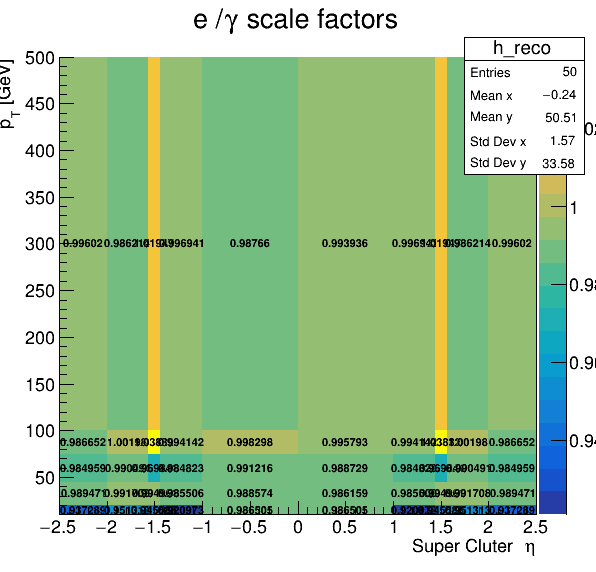

In [127]:
h_reco.Draw("colz, text")
c1.Draw()

In [40]:
h_sf_low.FindBin(0.1, 15)

18

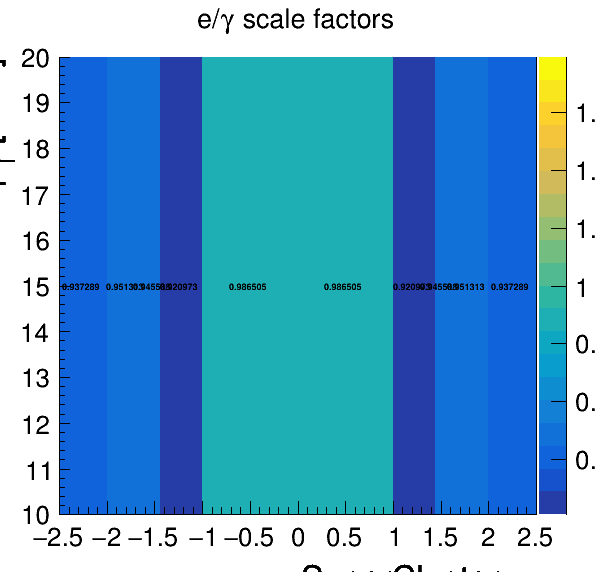

In [76]:
h_sf_low.Draw("colz text")
c1.Draw()